# Lame Cars Are a Better Deal #

## Introduction

In 2019 the global used car market was estimated to be a whopping 1332 billion US dollars (1). This was prior to the ubiquitous supply chain disruptions that are now part of our daily lives and the expectations of a 13% to 32% decline in global trade (2)(3). The turnover in used car inventory for August and September was the highest in six years (4). One large sector of used car sales comes from the eBay Vehicle Market. They have over 7.4 million users per month. A car or truck is sold every 3 minutes (5). That's of lot of interactions!

The main conclusion of this study is unpopular cars might be a better deal when using mileage as a metric. For the money spent they have lower mileage.

Let's take a quick look at a selection of 50,000 rows from a dataset created in 2015 for the German eBay marketplace, eBay Kleinanzeigen. The original data set can be found here.
https://data.world/data-society/used-cars-data

Citations
1. Grand View Research. Used Car Market Size, Share & Trends Analysis Report By Vehicle Type (Hybrid, Conventional, Electric), By Vendor Type, By Fuel Type, By Size, By Region, By Sales Channel, And Segment Forecasts, 2020 - 2027. Sept 2020.
https://www.grandviewresearch.com/industry-analysis/used-car-market
2. Li, X., Ghadami, A., Drake, J.M. et al. Mathematical model of the feedback between global supply chain disruption and COVID-19 dynamics. Sci Rep 11, 15450 (2021).
https://doi.org/10.1038/s41598-021-94619-1
3. World Trade Organization. Trade set to plunge as COVID-19 pandemic upends global economy. April 2020.
https://www.wto.org/english/news_e/pres20_e/pr855_e.htm
4. Eric Rosenbaum. The used car boom is one of the hottest, and trickiest, coronavirus markets for consumers. CNBC October 2020.
https://www.cnbc.com/2020/10/15/used-car-boom-is-one-of-hottest-coronavirus-markets-for-consumers.html
5. Welcome to the eBay Vehicle Seller Center. eBay. Sept 2021.
https://pages.ebay.com/sellerinformation/vehiclesellercenter.html

## Open and Examine Data Set
* An initial look at the data set shows 50,000 entries with 20 columns of information.
* Five of the columns are missing entries and in some the data needs to be converted to the correct type.
* Some of the entries are in German and need to be translated.

In [1]:
# import libraries and read csv
import emoji
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
autos = pd.read_csv("autos.csv", encoding="Latin-1")
# get info about dataset
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

In [2]:
# initial stats
autos.describe(include="all")

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-30 17:37:35,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [3]:
# first five rows
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## Begin Cleaning Data Set
* The `price` and `odometer` columns need to be converted to integers.
* The column titles could be more clear and use snake_case.
* It would be nice if the `name`, `brand`, `model`, and `vehicle_type` columns were grouped together.

In [4]:
# clean the price and odometer columns
autos["price"] = autos["price"].str.replace("$","").str.replace(",","")
autos["price"] = autos["price"].astype(int)
autos["odometer"] = autos["odometer"].str.replace(",","").str.replace("km","")
autos["odometer"] = autos["odometer"].astype(int)
autos.rename(columns={"odometer" : "odometer_km"}, inplace=True)
print("The data type for the price column is : ", autos["price"].dtypes)
print("The data type for the odometer_km column is : ", autos["odometer_km"].dtypes)
# change the column names
new_cols = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'year_of_registration', 'gearbox', 'powerPS', 'model',
       'odometer_km', 'month_of_registration', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_of_pictures', 'postal_code',
       'last_seen']
autos.columns = new_cols
# reorder columns
autos = autos.reindex(columns=["date_crawled", "price", "name", "brand", "model", "vehicle_type", "ab_test",
                   "odometer_km", "month_of_registration", "year_of_registration", "gearbox","powerPS",
                   "fuel_type", "unrepaired_damage", "ad_created", "postal_code", "last_seen",
                              "seller", "offer_type", "num_of_pictures"])

The data type for the price column is :  int64
The data type for the odometer_km column is :  int64


## Removing outliers and unnecessary columns
## Part 1 of 4
Looking at the `price` and `odometer` columns.
* The majority of the values in the price column are less than 500,000 but a small number are close to or well over 1,000,000! The rows for these prices do not appear to be unique in other ways nor are they related to the three columns being considered for removal. Two of the entries are for an expensive brand, but they are not representative of either group. Most of the expensive cars are priced a suspicious \\$12,345,678🤔. The high number of vehicles (1421) with a price of 0 will skew the results as well. Keeping all rows with prices between \\$1 and \\$500,00 seems to make sense.
* The odometer column doesn't contain any outlier values. It is broken into a group of 13 buckets. Notably, 64% of the entries are in the 150,000km or more category. There doesn't seem to be any reason to remove any of the rows based on the odometer entries.

In [5]:
# isolate the price column and reveal outlier values
price_series = autos["price"]
print("Here's the index and price for the 15 most expensive vehicles:\n", price_series.sort_values(ascending=False).head(n=15))
print("Here's the index and price for the 10 least expensive vehicles:\n", price_series.sort_values(ascending=False).tail(n=10))

Here's the index and price for the 15 most expensive vehicles:
 39705    99999999
42221    27322222
39377    12345678
47598    12345678
27371    12345678
2897     11111111
24384    11111111
11137    10000000
47634     3890000
7814      1300000
22947     1234566
43049      999999
514        999999
37585      999990
36818      350000
Name: price, dtype: int64
Here's the index and price for the 10 least expensive vehicles:
 31332    0
35821    0
8438     0
43925    0
38832    0
8445     0
29499    0
15225    0
43923    0
18089    0
Name: price, dtype: int64


In [6]:
# examine rows with outlier prices
cheap_cars = autos[autos["price"].between(1,100)]
print("The number of cars between $1 and $100: ", len(cheap_cars))
expensive_cars = autos[autos["price"]>500000]
print("The number of cars more than $500,000: ", len(expensive_cars))
free_cars = autos[autos["price"] == 0]
print("The number of cars that are free: ", len(free_cars))
outlier_bool = (autos["price"] < 1) | (autos["price"] > 500000)
outlier_rows = autos[outlier_bool]
outlier_rows.sort_values(by="price", axis=0, ascending=False)
print("This chart shows the most and least expensive cars.")

The number of cars between $1 and $100:  475
The number of cars more than $500,000:  14
The number of cars that are free:  1421
This chart shows the most and least expensive cars.


In [7]:
# remove rows with outlier prices
print("Length: ", len(autos))
autos = autos[autos["price"].between(1, 500000)]
print("Length: ", len(autos))

Length:  50000
Length:  48565


In [8]:
# isolate the odometer column and reveal outlier values
odometer_series = autos["odometer_km"]
print(odometer_series.unique().shape)
print(odometer_series.describe)
odometer_series.value_counts().sort_index(ascending=False).head(n=15)

(13,)
<bound method NDFrame.describe of 0        150000
1        150000
2         70000
3         70000
4        150000
          ...  
49995    100000
49996    150000
49997      5000
49998     40000
49999    150000
Name: odometer_km, Length: 48565, dtype: int64>


150000    31414
125000     5057
100000     2115
90000      1734
80000      1415
70000      1217
60000      1155
50000      1012
40000       815
30000       780
20000       762
10000       253
5000        836
Name: odometer_km, dtype: int64

## Removing outliers and unnecessary columns
### Part 2 of 4
We can probably remove these three columns and make a note in the conclusion.
* The `seller` and `offer_type` columns have only two values in each column. In each, one value represents all of the entries except for one entry.
* The `num_of_pictures` column only has one entry, "0".

In [9]:
# close look at value counts in three columns
print(autos["seller"].value_counts())
print(autos["offer_type"].value_counts())
print(autos["num_of_pictures"].value_counts())

privat        48564
gewerblich        1
Name: seller, dtype: int64
Angebot    48565
Name: offer_type, dtype: int64
0    48565
Name: num_of_pictures, dtype: int64


In [10]:
# drop the seller, offer_type, and num_of_pictures columns
autos = autos.drop(["seller", "offer_type", "num_of_pictures"], axis=1)

## Removing outliers and unnecessary columns
### Part 3 of 4
The date values are in string format and should be converted but an initial look shows some interesting things.
* The `date_crawled` column shows a normal distribution for when the ads were put into the data set. There are three low points that could be due to problems with the bot or network, or some other factor.
* The `date_created` column is heavily skewed to the left. However, the tail is very shallow and the vast majority of entries occurs under a normal distribution. Creating a frequency table shows some ads with much older `date_created` values than the rest of the set. This is the only one of the three with dates prior to March 2016. Again, there are three low points that interestingly appear to correspond to the low points in the date_crawled series. Removing any dates prior to the earliest date for the `date_crawled` column removes 203 entries. Looking at a line graph for `date_crawled` and `date_created` confirms that the dips occur at the same times.
* The `last_seen` column aligns more closely with `date_crawled` than the `date_created` column but there is a huge increase on April 4-6. These three days represent over 50% of the values in this column.


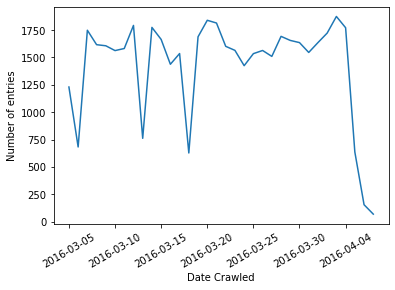

In [11]:
# isolate the date portion of the date_crawled column and count the number of entries per day
date_crawled_dist = autos["date_crawled"].str[:10].value_counts().sort_index()
# create a line plot showing crawl volume for each day
date_crawled_dist.plot.line()
plt.ylabel("Number of entries")
plt.xlabel("Date Crawled")
plt.xticks(rotation=30)
plt.show()

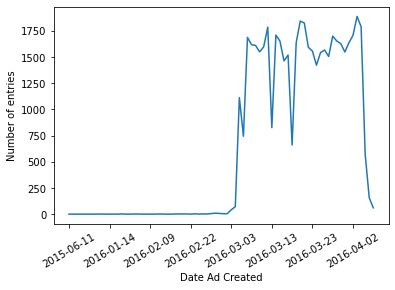

In [12]:
# isolate the date portion of the ad_created column and count the number of entries per day
ad_created_dist = autos["ad_created"].str[:10].value_counts().sort_index()
# create a line plot showing day the ad was created
ad_created_dist.plot.line()
plt.ylabel("Number of entries")
plt.xlabel("Date Ad Created")
plt.xticks(rotation=30)
plt.show()

48362
48362


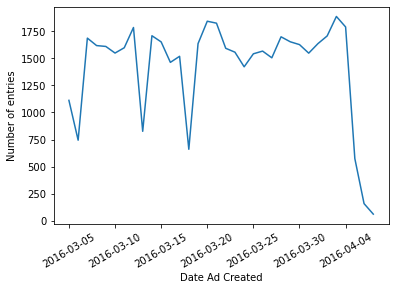

In [13]:
# remove early entries so ad_created start date matches dates for date_crawled column
autos = autos[autos["ad_created"].str[:4] != "2015"]
autos = autos[autos["ad_created"].str[:7] != "2016-01"]
autos = autos[autos["ad_created"].str[:7] != "2016-02"]
autos = autos[autos["ad_created"].str[:10] != "2016-03-01"]
autos = autos[autos["ad_created"].str[:10] != "2016-03-02"]
autos = autos[autos["ad_created"].str[:10] != "2016-03-03"]
autos = autos[autos["ad_created"].str[:10] != "2016-03-04"]
print(len(autos))
# create a line plot showing day the ad was created
print(len(autos))
ad_created_dist = autos["ad_created"].str[:10].value_counts().sort_index()
ad_created_dist.plot.line()
plt.ylabel("Number of entries")
plt.xlabel("Date Ad Created")
plt.xticks(rotation=30)
plt.show()

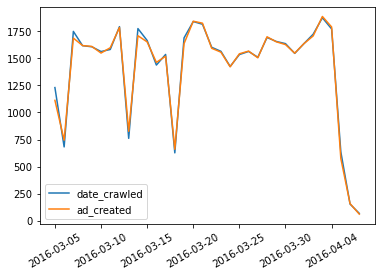

In [14]:
# create a line plot that shows date_crawled and ad_created
distributions = [date_crawled_dist, ad_created_dist]
for distribution in distributions:
    distribution.plot.line()
plt.legend()
plt.xticks(rotation=30)
plt.show()

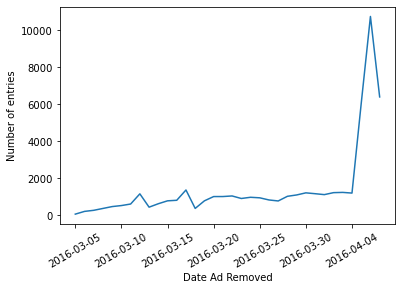

In [15]:
# isolate the date portion of the last_seen column and count the number of entries per day
last_seen_dist = autos["last_seen"].str[:10].value_counts().sort_index()
# create a line plot showing day the ad was removed
last_seen_dist.plot.line()
plt.ylabel("Number of entries")
plt.xlabel("Date Ad Removed")
plt.xticks(rotation=30)
plt.show()

In [16]:
# create a frequency table for the last_seen column
# this allows for a more precise measure for the volume in the last three days
last_seen_freq = autos["last_seen"].str[:10].value_counts(normalize=True, dropna=False)*100
last_seen_freq = last_seen_freq.sort_index()
last_seen_freq

2016-03-05     0.097184
2016-03-06     0.403209
2016-03-07     0.525206
2016-03-08     0.734047
2016-03-09     0.942889
2016-03-10     1.056615
2016-03-11     1.228237
2016-03-12     2.367561
2016-03-13     0.876721
2016-03-14     1.261321
2016-03-15     1.585956
2016-03-16     1.647988
2016-03-17     2.799719
2016-03-18     0.736115
2016-03-19     1.585956
2016-03-20     2.063604
2016-03-21     2.065671
2016-03-22     2.131839
2016-03-23     1.848559
2016-03-24     1.982962
2016-03-25     1.922997
2016-03-26     1.683140
2016-03-27     1.571482
2016-03-28     2.092552
2016-03-29     2.243497
2016-03-30     2.479219
2016-03-31     2.384103
2016-04-01     2.280716
2016-04-02     2.501964
2016-04-03     2.528845
2016-04-04     2.454406
2016-04-05    12.478806
2016-04-06    22.221992
2016-04-07    13.214921
Name: last_seen, dtype: float64

## Removing outliers and unnecessary columns
### Part 4 of 4
The `year_of_registration` column has 5 entries prior to 1900 and 1879 after 2016. It's unlikely that any of these dates are correct. It would take far to long to look up the true values for these entries and using a mean value would not be appropriate for what this column represents. Removing them might allow a more accurate view of the distribution. Interestingly, while this does affect the minimum, maximum, and standard deviation values, it results in little change to the upper ends of the first, second, and third quartiles.

In [17]:
# isolate the year_of_registration column and get initial stats
registration_series = autos["year_of_registration"]
print(registration_series.describe())

count    48362.000000
mean      2004.757371
std         88.828659
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: year_of_registration, dtype: float64


In [18]:
# remove year_of_registration outliers
print(len(autos[autos["year_of_registration"] < 1900]))
print(len(autos[autos["year_of_registration"] > 2016]))
print("The length of the data set before removing outlier registration year values is: ", len(autos))
autos = autos[autos["year_of_registration"].between(1900, 2016)]
print("The length of the data set after removing outlier registration year values is: ", len(autos))

5
1870
The length of the data set before removing outlier registration year values is:  48362
The length of the data set after removing outlier registration year values is:  46487


In [19]:
# isolate the year_of_registration column and get final stats
registration_series = autos["year_of_registration"]
print(registration_series.describe())
print("The earliest year for a vehicle to be registered is:", registration_series.min())
print("The latest year for a vehicle to be registered is:", registration_series.max())

count    46487.000000
mean      2002.907480
std          7.188417
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2008.000000
max       2016.000000
Name: year_of_registration, dtype: float64
The earliest year for a vehicle to be registered is: 1910
The latest year for a vehicle to be registered is: 2016


## Focusing on the Brand
At this point the dataset is prepared for an initial analysis. Vehicle brand is an easy way for consumers to evaluate a purchase. Using this as a starting point leads to a few coclusions.
* The three most popular brands (Volkswagen, BMW, and Opel respectively) represent slightly more than 50% of the vehicles in the data set. Un-commenting "# print(brand_value_counts)" displays the frequency table.
* Of the five least most popular vehicles, Ladas and Trabants have very low mileage. Their unpopularity is probably due to quality perceptions.
* The price_mileage_ratio column shows the relationship between mean_price and mean_odomkm. The closer the number to zero, the lower the vehicle mileage per dollar spent. So, amongst the five most popular brands, audis had the lowest mileage per dollar in the mean price.
* Additionally, this allows a comparison of value compared to popularity. The mean price for the five most popular cars is \$6935 and for the five least popular it is \$2101. The price to mileage ratio for the popular cars is 0.05 and for the unpopular cars it is 0.114. So not only is an unpopular car less expensive it is also a better deal if mileage is the only criteria.
* Coding a dashboard to combine different columns and row slices to create new ratios would possibly show more unexpected results.
* Lastly, it would be interesting to examine the rows with outlier prices. If the price is controled for in some way would that group reveal similar paterns?

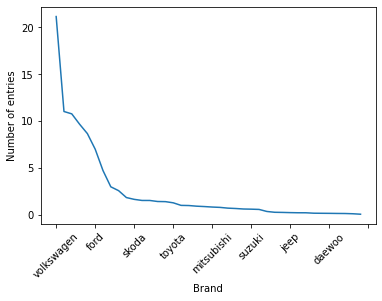

In [20]:
# isolate the brand column and look at totals and relative frequencies.
brand_series = autos["brand"]
# brand_value_counts = brand_series.value_counts()
brand_value_counts = brand_series.value_counts(normalize=True, dropna=False)*100
# print(brand_value_counts)
# create a line plot showing volume of sales by brand
# how do i get volkswagen on the last tick?
brand_value_counts.plot.line()
plt.ylabel("Number of entries")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.show()

In [21]:
# a function to create a dictionary and mean column value for part of a series
def autos_converter(c_series, mean_column, start_slice=0, stop_slice=5):
    """
    Takes a series index and returns that index and the mean of a column in the autos dataframe.
    Can be sliced. Default = 0:5
    Example:
    >>> autos_converter(c_series=brand_value_counts, mean_column="price", stop_slice=2)
    {'volkswagen': 5404.27828123409, 'bmw': 8337.549843627834}
    """
    series_slice = c_series.iloc[start_slice:stop_slice]
    series_dict = {}
    for index in series_slice.index:
        index_mean = autos.loc[autos["brand"] == index, mean_column].mean()
        series_dict[index] = index_mean
    return series_dict

In [22]:
# create dictionary with brand and mean price for top five selling brands
t5_mean_price = autos_converter(c_series=brand_value_counts, mean_column="price")
# create dictionary with brand and mean odometer_km for top five selling brands
t5_mean_odomkm = autos_converter(c_series=brand_value_counts, mean_column="odometer_km")

In [23]:
# i could have made another fundtion but i have to get onto the next project!
# transform t5_mean_price dictionary to dataframe
t5_mean_price_series = pd.Series(t5_mean_price)
t5_df = pd.DataFrame(t5_mean_price_series, columns=["mean_price"])
# add columns for mean odometer_km and relative frequency in original df
t5_mean_odomkm_series = pd.Series(t5_mean_odomkm)
t5_df["mean_odomkm"] = t5_mean_odomkm_series
t5_df["%_in_autos"] = brand_value_counts[:5]
t5_df = t5_df.astype(int)
t5_df = t5_df.reset_index()
t5_df = t5_df.rename(columns={'index': 'brand'})

In [24]:
# create dictionary with brand and mean price for five least selling brands
l5_mean_price = autos_converter(c_series=brand_value_counts, mean_column="price", start_slice=-5, stop_slice=None)
# create dictionary with brand and mean odometer_km for five least selling brands
l5_mean_odomkm = autos_converter(c_series=brand_value_counts, mean_column="odometer_km", start_slice=-5, stop_slice=None)

In [25]:
# transform l5_mean_price dictionary to dataframe
l5_mean_price_series = pd.Series(l5_mean_price)
l5_df = pd.DataFrame(l5_mean_price_series, columns=["mean_price"])
# add columns for mean odometer_km and relative frequency in original df
l5_mean_odomkm_series = pd.Series(l5_mean_odomkm)
l5_df["mean_odomkm"] = l5_mean_odomkm_series
l5_df["%_in_autos"] = brand_value_counts[-5:]
l5_df = l5_df.astype(int)
l5_df = l5_df.reset_index()
l5_df = l5_df.rename(columns={'index': 'brand'})

In [26]:
t5_df["price_mileage_ratio"] = 0
t5_df["price_mileage_ratio"] = t5_df["mean_price"] / t5_df["mean_odomkm"]
l5_df["price_mileage_ratio"] = 0
l5_df["price_mileage_ratio"] = l5_df["mean_price"] / l5_df["mean_odomkm"]

In [27]:
# pretty print dataframes for five most sold brands and five least sold brands
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)
display(t5_df)
display(l5_df)

,brand,mean_price,mean_odomkm,%_in_autos,price_mileage_ratio
0,volkswagen,5404,128695,21,0.042
1,bmw,8337,132600,11,0.063
2,opel,2966,129425,10,0.023
3,mercedes_benz,8625,130786,9,0.066
4,audi,9341,129118,8,0.072


,brand,mean_price,mean_odomkm,%_in_autos,price_mileage_ratio
0,daewoo,1049,121642,0,0.009
1,trabant,1790,54538,0,0.033
2,rover,1602,137661,0,0.012
3,lancia,3376,121900,0,0.028
4,lada,2688,83518,0,0.032


## Looking for More Correlations

In [28]:
# run a pairwise correlation of columns
autos.corr()

,price,odometer_km,month_of_registration,year_of_registration,powerPS,postal_code
price,1.000,-3.858e-01,5.484e-02,0.312,0.191,0.072
odometer_km,-0.386,1.000e+00,2.708e-04,-0.266,-0.019,-0.023
month_of_registration,0.055,2.708e-04,1.000e+00,0.070,0.047,0.011
year_of_registration,0.312,-2.662e-01,7.039e-02,1.000,0.077,0.036
powerPS,0.191,-1.940e-02,4.706e-02,0.077,1.000,0.027
postal_code,0.072,-2.283e-02,1.061e-02,0.036,0.027,1.000


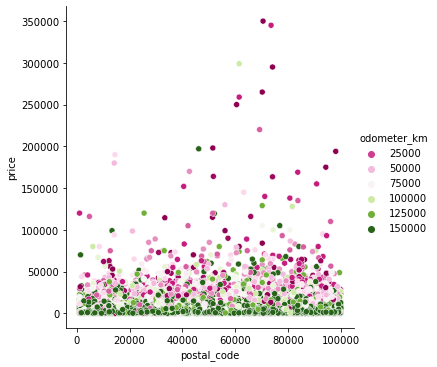

In [29]:
# is this a relationship between a group of the most expensive cars and the zip_code?
# odometer_km is/might be irrelevant
sns.relplot(data=autos, x="postal_code", y="price", hue="odometer_km", palette="PiYG")
plt.show()